# Exercise 1: Customer Segmentation

#### 1. Exploratory Data Analysis:

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
dataset = pd.read_csv("Wholesale_customers_data.csv")

# Display the first few rows of the data
print(dataset.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [3]:
# Check the dimensions of the data
print("Data shape:", dataset.shape)

# Check the data types of the columns
print("Data types:\n", dataset.dtypes)

# Check for missing values
print("Missing values:\n", dataset.isnull().sum())

# Compute basic statistical measures
print("Summary statistics:\n", dataset.describe())

# Drop any rows with missing values
dataset.dropna(inplace=True)

Data shape: (440, 8)
Data types:
 Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object
Missing values:
 Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64
Summary statistics:
           Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   

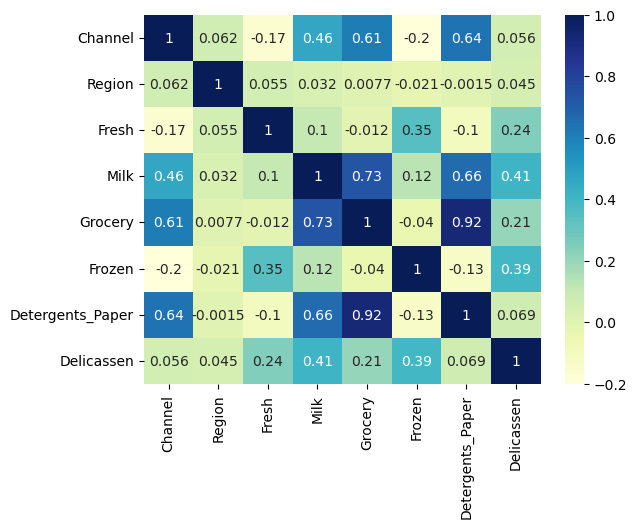

In [4]:
# Check correlations between numerical features
correlation = dataset.corr()
sns.heatmap(correlation, annot = True, cmap="YlGnBu")
plt.show()

#### 2. Data Preprocessing

In [5]:
# Drop any rows with missing values
dataset = dataset.dropna()

In [6]:
# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_dataset = scaler.fit_transform(dataset)

#### 3. K-means Clustering:

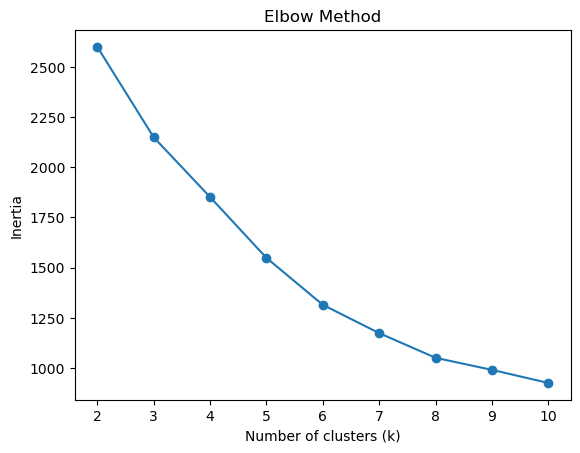

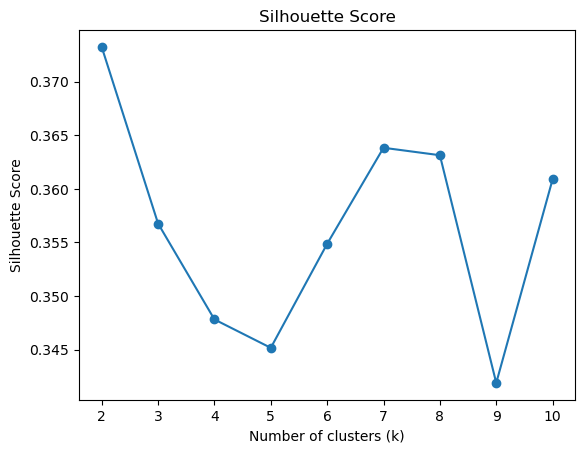

In [7]:
# Elbow method to determine the optimal number of clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
inertia = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_dataset)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_dataset, kmeans.labels_))

# Plot the Elbow method
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Plot the Silhouette score
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()


In [8]:
# Apply K-Means clustering with the optimal number of clusters
i = 3
kmeans = KMeans(n_clusters=i, random_state=42)
kmeans.fit(scaled_dataset)
labels = kmeans.labels_

# Add cluster labels to the original dataset
dataset['Cluster'] = labels

# Analyze characteristics of each cluster
cluster_stats = dataset.groupby('Cluster').mean()
print(cluster_stats)

          Channel    Region         Fresh          Milk       Grocery  \
Cluster                                                                 
0        2.000000  2.623077   8165.915385   8748.515385  13905.492308   
1        1.003367  2.505051  13075.898990   3218.737374   3855.696970   
2        1.846154  2.615385  25770.769231  35160.384615  41977.384615   

              Frozen  Detergents_Paper   Delicassen  
Cluster                                              
0        1441.630769       5991.146154  1535.007692  
1        3620.400673        776.875421  1242.249158  
2        6844.538462      19867.384615  7880.307692  
